In [29]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [75]:
import os

def list_files(directory_path):
    """
    Lists all files in a directory and returns a list of full paths.
    
    Args:
        directory_path (str): The path to the directory.
        
    Returns:
        list: A list of full paths to the files in the directory.
    """
    file_paths = []
    
    for root, _, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_paths.append(file_path)
    
    return file_paths

val_imgs = list_files('/home/zozan-server/Desktop/litter')
 

In [69]:
# Model path
#../configs/mask_rcnn/mask-rcnn_r101_fpn_1x_taco.py
# Model weights
#../work_dirs/mask-rcnn_r101_fpn_1x_taco/epoch_18.pth

import json

def open_json(file_path):
    """
    Opens and reads a JSON file.
    
    Args:
        file_path (str): The path to the JSON file.
        
    Returns:
        dict: The JSON data loaded as a dictionary.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    return data

train_json=open_json("/home/zozan-server/Work/FER/TACO/data/taco_train.json")
val_json = open_json("/home/zozan-server/Work/FER/TACO/data/taco_val.json")

origin_ = "/home/zozan-server/Work/FER/TACO/data/"

#rint(train_json.keys())
#rint(train_json['images'])

train_imgs = [f['file_name'] for f in train_json['images']]
test_imgs = [f['file_name'] for f in val_json['images']]

full_train_imgs = ["{}{}".format(origin_, f) for f in train_imgs]
full_test_imgs = ["{}{}".format(origin_, f) for f in test_imgs]

In [30]:
# download the checkpoint demo
#!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
config_file = '../configs/mask_rcnn/mask-rcnn_r101_fpn_1x_taco.py'
checkpoint_file = '../work_dirs/mask-rcnn_r101_fpn_1x_taco/epoch_18.pth'

In [31]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ../work_dirs/mask-rcnn_r101_fpn_1x_taco/epoch_18.pth


In [46]:
# test a single image

def get_img(full_path):
    return mmcv.imread(full_path, channel_order='rgb')

def inference(model, full_path): 
    img = get_img(full_path)
    result = inference_detector(model, img)
    return result

In [47]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/zozan-server/anaconda3/envs/mmdet/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


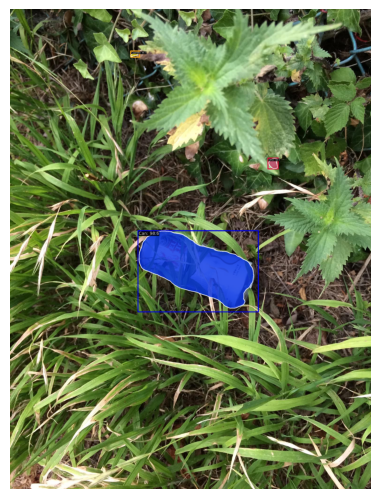

In [102]:
# show the results
results = []
start_n = 0
n = 4
imgs = full_train_imgs
for i, pth in enumerate(imgs):
    if i == n:
        img = get_img(pth)
        result = inference(model, pth)
        visualizer.add_datasample(
            result, 
            img,
            data_sample=result,
            draw_gt=False,
            wait_time=0,
        )
visualizer.show()

In [ ]:
print(full_test_imgs)